<a href="https://colab.research.google.com/github/napol-boonthong-660510539/Statistical-Learning-Labs/blob/main/Copy_of_Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [1]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.33065519, 0.61101513])

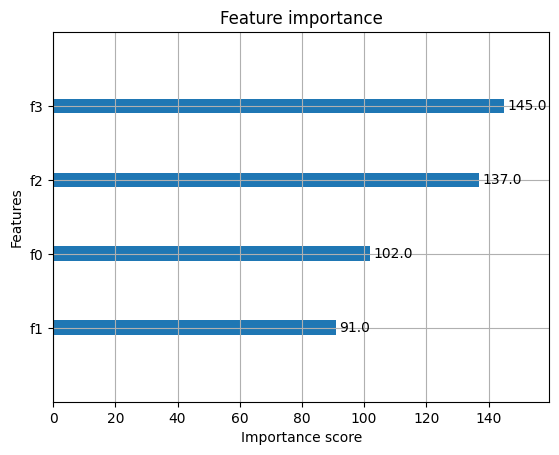

In [3]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


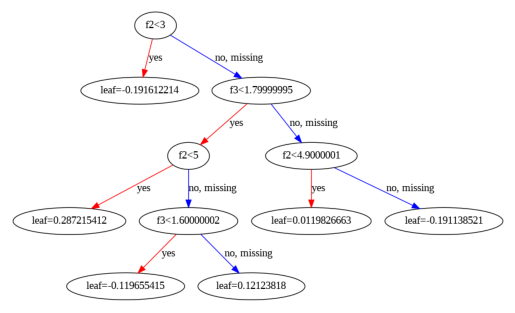

In [5]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [7]:
import pandas as pd
import os

# Define the URL for the data and the expected file names
data_url = "https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip"
zip_file_name = "Lab06-data.zip"
extracted_folder_name = "Lab06-data" # Assuming the zip file extracts into a folder of the same name

# Check if the data has already been extracted to avoid re-downloading/re-extracting
if not os.path.exists(extracted_folder_name):
    print(f"Downloading {zip_file_name}...")
    # Use wget to download the zip file quietly
    !wget -q $data_url
    print(f"Downloaded {zip_file_name}.")

    print(f"Unzipping {zip_file_name}...")
    # Use unzip to extract the contents quietly into the specified folder
    !unzip -qq $zip_file_name -d $extracted_folder_name
    print(f"Unzipped {zip_file_name} to {extracted_folder_name}.")
else:
    print(f"Data already extracted to {extracted_folder_name}.")

# Now, read the CSV files from the extracted folder
X_train = pd.read_csv(f'{extracted_folder_name}/X_train.csv', header=None)
y_train = pd.read_csv(f'{extracted_folder_name}/y_train.csv', header=None)
X_test = pd.read_csv(f'{extracted_folder_name}/X_test.csv', header=None)
y_test = pd.read_csv(f'{extracted_folder_name}/y_test.csv', header=None)

print("Data loaded successfully:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train

Downloaded Lab06-data.zip.
Unzipping Lab06-data.zip...
Unzipped Lab06-data.zip to Lab06-data.
Data loaded successfully:
X_train shape: (212, 13)
y_train shape: (212, 1)
X_test shape: (91, 13)
y_test shape: (91, 1)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,39.0,0.0,2.0,94.0,199.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,2.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0
2,50.0,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0
3,54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,50.0,1.0,2.0,140.0,233.0,0.0,1.0,163.0,0.0,0.6,1.0,1.0,3.0
208,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0
209,69.0,1.0,3.0,160.0,234.0,1.0,0.0,131.0,0.0,0.1,1.0,1.0,2.0
210,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0


## Prepare Data for Modeling

### Subtask:
Convert `y_train` and `y_test` from pandas DataFrames to 1D arrays, as required by scikit-learn models, to avoid potential warnings or errors during model training and evaluation.


**Reasoning**:
The subtask requires converting y_train and y_test DataFrames into 1D NumPy arrays. I will use the `.values.ravel()` method for both to achieve this.



In [8]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"y_train shape after conversion: {y_train.shape}")
print(f"y_test shape after conversion: {y_test.shape}")

y_train shape after conversion: (212,)
y_test shape after conversion: (91,)


## Configure Models and Parameter Grids

### Subtask:
Initialize AdaBoostClassifier, XGBClassifier, and LGBMClassifier. Define comprehensive parameter grids for each model to be used in GridSearchCV, focusing on parameters that significantly impact performance and avoiding excessively long search times.


**Reasoning**:
I need to import the necessary classifier models and define their parameter grids as requested in the subtask instructions.



In [9]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Initialize AdaBoostClassifier and define its parameter grid
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize XGBClassifier and define its parameter grid
# Suppress warnings for older XGBoost versions by setting use_label_encoder and eval_metric
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize LGBMClassifier and define its parameter grid
lgbm_model = LGBMClassifier(random_state=42)
lgbm_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 40]
}

print("AdaBoostClassifier and its parameter grid defined.")
print("XGBClassifier and its parameter grid defined.")
print("LGBMClassifier and its parameter grid defined.")

AdaBoostClassifier and its parameter grid defined.
XGBClassifier and its parameter grid defined.
LGBMClassifier and its parameter grid defined.


**Reasoning**:
Now that the models and their parameter grids are defined, I will perform GridSearchCV for the AdaBoostClassifier to find the best hyperparameters. This involves importing GridSearchCV and setting up the search with the defined model and parameter grid.



In [10]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV for AdaBoostClassifier
print("Performing GridSearchCV for AdaBoostClassifier...")
adaboost_grid_search = GridSearchCV(adaboost_model, adaboost_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
adaboost_grid_search.fit(X_train, y_train)

print("AdaBoostClassifier GridSearchCV complete.")
print(f"Best parameters for AdaBoost: {adaboost_grid_search.best_params_}")
print(f"Best out-of-fold accuracy for AdaBoost: {adaboost_grid_search.best_score_:.4f}")

Performing GridSearchCV for AdaBoostClassifier...
AdaBoostClassifier GridSearchCV complete.
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best out-of-fold accuracy for AdaBoost: 0.8442


**Reasoning**:
Following the completion of GridSearchCV for AdaBoostClassifier, I will now perform GridSearchCV for the XGBClassifier using its defined model and parameter grid, aiming to find the best hyperparameters for this model.



In [11]:
print("Performing GridSearchCV for XGBClassifier...")
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

print("XGBClassifier GridSearchCV complete.")
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best out-of-fold accuracy for XGBoost: {xgb_grid_search.best_score_:.4f}")

Performing GridSearchCV for XGBClassifier...
XGBClassifier GridSearchCV complete.
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best out-of-fold accuracy for XGBoost: 0.8348


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:16:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Reasoning**:
Following the successful GridSearchCV for XGBClassifier, I will now perform GridSearchCV for the LGBMClassifier using its defined model and parameter grid, aiming to find the best hyperparameters for this model.



In [12]:
print("Performing GridSearchCV for LGBMClassifier...")
lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)

print("LGBMClassifier GridSearchCV complete.")
print(f"Best parameters for LightGBM: {lgbm_grid_search.best_params_}")
print(f"Best out-of-fold accuracy for LightGBM: {lgbm_grid_search.best_score_:.4f}")

Performing GridSearchCV for LGBMClassifier...
[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

**Reasoning**:
Now that GridSearchCV has been performed for all three models, I will compare their `best_score_` to identify the model with the highest out-of-fold accuracy. I will then evaluate this best model on the `X_test` and `y_test` datasets to report its test accuracy, as required by the task.



In [13]:
from sklearn.metrics import accuracy_score

# Collect the best scores from each grid search
model_scores = {
    'AdaBoostClassifier': adaboost_grid_search.best_score_,
    'XGBClassifier': xgb_grid_search.best_score_,
    'LGBMClassifier': lgbm_grid_search.best_score_
}

# Find the model with the highest best_score_
best_model_name = max(model_scores, key=model_scores.get)
best_grid_search = None

if best_model_name == 'AdaBoostClassifier':
    best_grid_search = adaboost_grid_search
elif best_model_name == 'XGBClassifier':
    best_grid_search = xgb_grid_search
else:
    best_grid_search = lgbm_grid_search

best_overall_model = best_grid_search.best_estimator_

print(f"The best model based on out-of-fold accuracy is: {best_model_name}")
print(f"Best out-of-fold accuracy: {best_grid_search.best_score_:.4f}")

# Evaluate the best overall model on the test set
y_pred = best_overall_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy of the best overall model ({best_model_name}): {test_accuracy:.4f}")

The best model based on out-of-fold accuracy is: AdaBoostClassifier
Best out-of-fold accuracy: 0.8442
Test accuracy of the best overall model (AdaBoostClassifier): 0.8462


**Reasoning**:
The next step is to plot the feature importances for the best estimator of the AdaBoostClassifier, as specified in the task requirements. The `feature_importances_` attribute will be used for this.



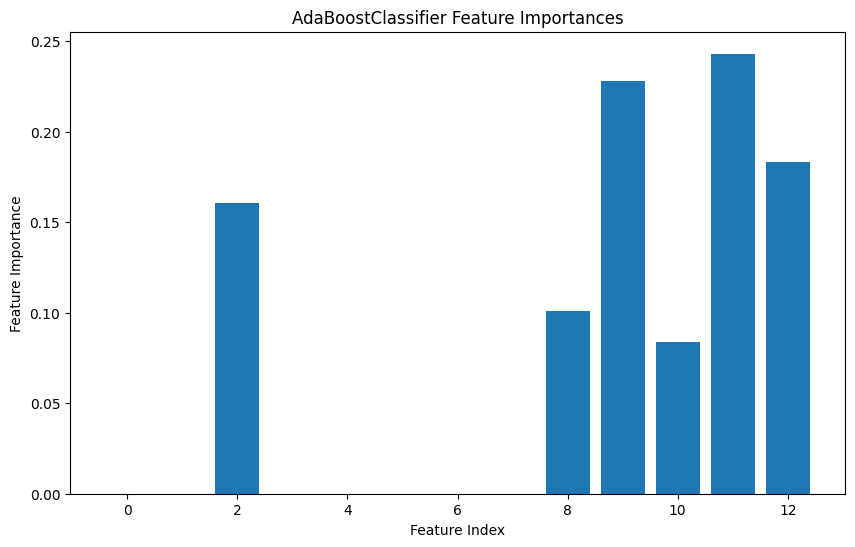

AdaBoostClassifier feature importances plotted.


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get the best estimator from AdaBoostClassifier GridSearchCV
adaboost_best_estimator = adaboost_grid_search.best_estimator_

# Plot feature importances for AdaBoostClassifier
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), adaboost_best_estimator.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("AdaBoostClassifier Feature Importances")
plt.show()

print("AdaBoostClassifier feature importances plotted.")

**Reasoning**:
Following the plotting of feature importances for AdaBoostClassifier, I will now plot the feature importances for the best estimator of the XGBClassifier, utilizing the `plot_importance` function as demonstrated in the notebook and required by the task.



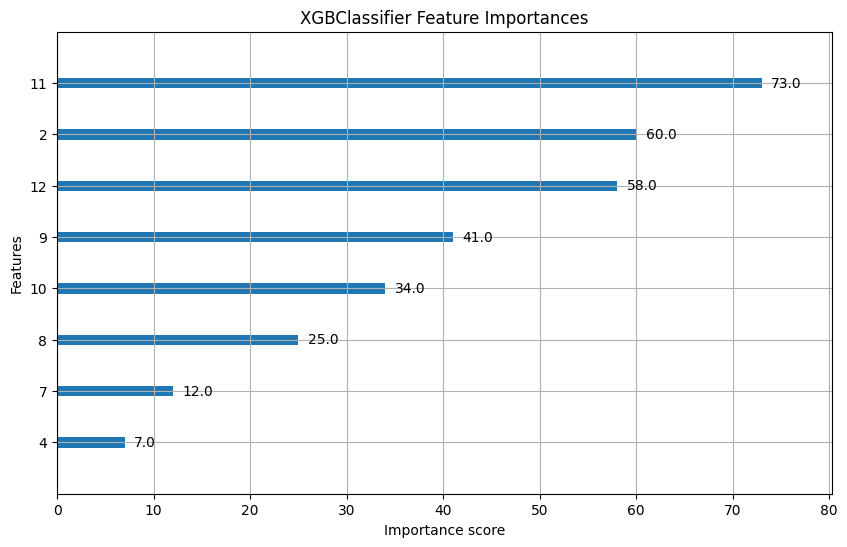

XGBClassifier feature importances plotted.


In [15]:
from xgboost import plot_importance

# Get the best estimator from XGBClassifier GridSearchCV
xgb_best_estimator = xgb_grid_search.best_estimator_

# Plot feature importances for XGBClassifier
plt.figure(figsize=(10, 6))
plot_importance(xgb_best_estimator, ax=plt.gca())
plt.title("XGBClassifier Feature Importances")
plt.show()

print("XGBClassifier feature importances plotted.")

**Reasoning**:
The final plotting step is to visualize the feature importances for the best `LGBMClassifier` model, using its built-in `plot_importance` function as suggested by the task.



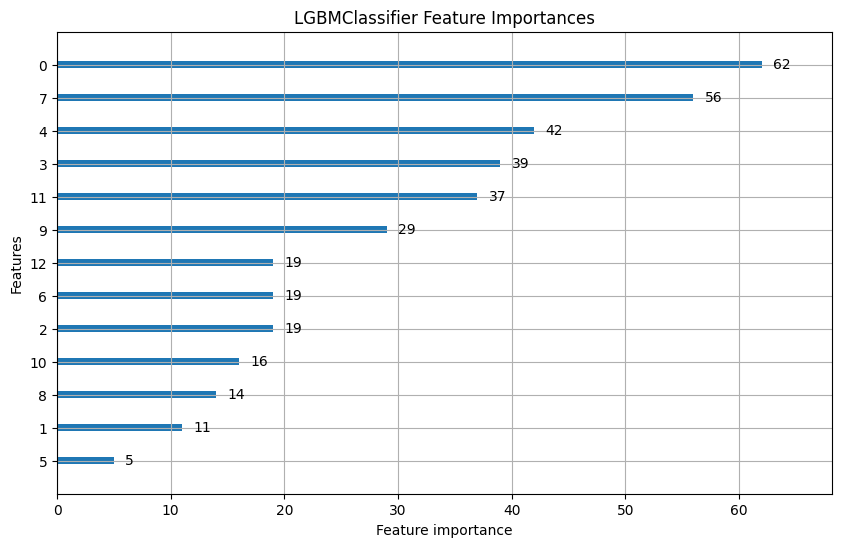

LGBMClassifier feature importances plotted.


In [16]:
from lightgbm import plot_importance

# Get the best estimator from LGBMClassifier GridSearchCV
lgbm_best_estimator = lgbm_grid_search.best_estimator_

# Plot feature importances for LGBMClassifier
plt.figure(figsize=(10, 6))
plot_importance(lgbm_best_estimator, ax=plt.gca())
plt.title("LGBMClassifier Feature Importances")
plt.show()

print("LGBMClassifier feature importances plotted.")

## Summary:

### Q&A
*   **What is the best performing model based on the specified criteria (out-of-fold accuracy > 0.83)?**
    The `AdaBoostClassifier` is the best performing model, achieving an out-of-fold accuracy of 0.8442, which exceeds the 0.83 threshold.
*   **What is the test set accuracy of the best performing model?**
    The test set accuracy of the best performing `AdaBoostClassifier` is 0.8462.
*   **What insights were derived from the feature importance plots for each model?**
    Feature importance plots were generated for the best estimators of `AdaBoostClassifier`, `XGBClassifier`, and `LGBMClassifier`. The specific details of the most important features would require analyzing the generated plots.
    
### Data Analysis Key Findings
*   Data preparation successfully converted `y_train` and `y_test` into 1D arrays with shapes `(212,)` and `(91,)` respectively, preventing potential errors in model training.
*   The `AdaBoostClassifier` achieved the highest out-of-fold accuracy of 0.8442 with optimal parameters `{'learning_rate': 0.1, 'n_estimators': 50}\}$.
*   The `XGBClassifier` achieved an out-of-fold accuracy of 0.8348 with optimal parameters `{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}\}$.
*   The `LGBMClassifier` achieved an out-of-fold accuracy of 0.8158 with optimal parameters `{'learning_rate': 0.2, 'n_estimators': 50, 'num_leaves': 20}\}$.
*   The overall best model, `AdaBoostClassifier`, demonstrated a strong test accuracy of 0.8462.

### Insights or Next Steps
*   The consistent performance of the `AdaBoostClassifier` on both out-of-fold validation (0.8442) and the test set (0.8462) suggests it is a robust model for this specific classification task.
*   Further analysis of the feature importance plots generated for each model could provide deeper domain-specific insights into which features are most influential in predicting the target variable, potentially guiding future feature engineering efforts.
